<a href="https://colab.research.google.com/github/paris3169/ZM-study-practice/blob/main/time_series_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import random
import time

In [ ]:
import pandas as pd

let's create a fake price historical data series

In [2]:
mu=100
std=5

In [3]:
prices=np.random.normal(mu,std,size=1000)

In [4]:
prices.size

1000

In [5]:
prices[:10]

array([101.43741083,  98.34540634,  94.92664824, 103.64036925,
       100.69213887, 108.41770536,  96.71092312,  98.27851717,
        96.01943952,  96.33365297])

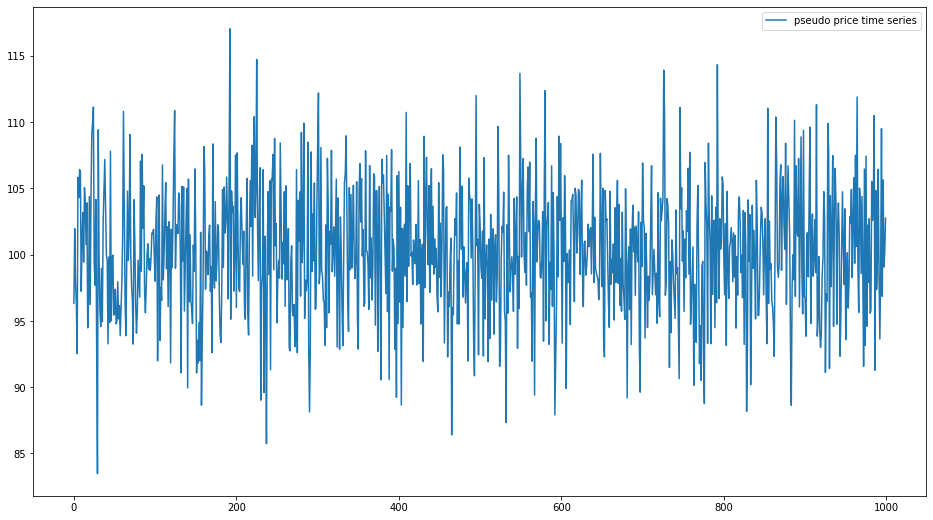

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(prices,label="pseudo price time series")
plt.legend()

Now I want to create lagged prices seried with a window (mav number of lags) and also an horizon (number of pseudo future prices that are used as labels for training)
Let's start creating **lagged price series** from the original one

**Alt1** Let's use pandas to generated a windowed 2D array of prices

In [6]:
indexes=np.arange(0,len(prices))

In [7]:
df=pd.DataFrame(prices,columns=["price"],index=indexes)

In [8]:
df.info(),df["price"].mean(),df["price"].std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


(None, 99.92081486807874, 5.039925558880558)

In [9]:
WINDOW=6
HORIZON=1

In [10]:
df.dropna(inplace=True)

In [11]:
windowed_prices=df.values

In [12]:
df

,price
0,101.437411
1,98.345406
2,94.926648
3,103.640369
4,100.692139
...,...
995,98.913991
996,92.581715
997,95.763058
998,94.319131


now let's functionalize these lines of codes

In [16]:
def calculate_price_window(price_series,window,horizon):

  df=pd.DataFrame(price_series,columns=["price"])
  window_size=window+horizon
  for i in range(1,window_size):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True) 
  window_prices=df.iloc[:,horizon:].values
  horizon_prices=df.iloc[:,:horizon].values
  return np.round(window_prices,3),np.round(horizon_prices,3),df

In [17]:
start=time.time()
past_prices,label_prices,df=calculate_price_window(prices,5,1)
delta=time.time()-start
print(f"{delta} in seconds")

0.01147913932800293 in seconds


In [18]:
past_prices[:10],label_prices[:10]

(array([[100.692, 103.64 ,  94.927,  98.345, 101.437],
        [108.418, 100.692, 103.64 ,  94.927,  98.345],
        [ 96.711, 108.418, 100.692, 103.64 ,  94.927],
        [ 98.279,  96.711, 108.418, 100.692, 103.64 ],
        [ 96.019,  98.279,  96.711, 108.418, 100.692],
        [ 96.334,  96.019,  98.279,  96.711, 108.418],
        [ 98.122,  96.334,  96.019,  98.279,  96.711],
        [108.847,  98.122,  96.334,  96.019,  98.279],
        [ 96.998, 108.847,  98.122,  96.334,  96.019],
        [ 96.534,  96.998, 108.847,  98.122,  96.334]]), array([[108.418],
        [ 96.711],
        [ 98.279],
        [ 96.019],
        [ 96.334],
        [ 98.122],
        [108.847],
        [ 96.998],
        [ 96.534],
        [102.388]]))

In [19]:
df

,price,lag1,lag2,lag3,lag4,lag5
5,108.417705,100.692139,103.640369,94.926648,98.345406,101.437411
6,96.710923,108.417705,100.692139,103.640369,94.926648,98.345406
7,98.278517,96.710923,108.417705,100.692139,103.640369,94.926648
8,96.019440,98.278517,96.710923,108.417705,100.692139,103.640369
9,96.333653,96.019440,98.278517,96.710923,108.417705,100.692139
...,...,...,...,...,...,...
995,98.913991,95.579280,92.911813,108.297273,99.521130,97.266105
996,92.581715,98.913991,95.579280,92.911813,108.297273,99.521130
997,95.763058,92.581715,98.913991,95.579280,92.911813,108.297273
998,94.319131,95.763058,92.581715,98.913991,95.579280,92.911813


In [20]:
past_prices.shape,label_prices.shape

((995, 5), (995, 1))

In [ ]:
for i in range(5):
  print(f"{past_prices[i]},==> {label_prices[i]}")

[ 92.533  96.389  97.853 101.961  96.327],==> [105.836]
[105.836  92.533  96.389  97.853 101.961],==> [104.308]
[104.308 105.836  92.533  96.389  97.853],==> [106.422]
[106.422 104.308 105.836  92.533  96.389],==> [106.238]
[106.238 106.422 104.308 105.836  92.533],==> [97.232]


**function to do the splitting of time series**


In [ ]:
past_prices.shape

(995, 5)

In [ ]:
def train_test_split(X,y,test_split):

  split=int(len(X)*(1-test_split))
  X_train=X[:split]
  X_test=X[split:]
  y_train=y[:split]
  y_test=y[split:]
  return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(past_prices,label_prices,0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((796, 5), (199, 5), (796, 1), (199, 1))

In [ ]:
past_prices.shape,label_prices.shape

((995, 5), (995, 1))

In [ ]:
X_train[:10],y_train[:10]

(array([[ 92.533,  96.389,  97.853, 101.961,  96.327],
        [105.836,  92.533,  96.389,  97.853, 101.961],
        [104.308, 105.836,  92.533,  96.389,  97.853],
        [106.422, 104.308, 105.836,  92.533,  96.389],
        [106.238, 106.422, 104.308, 105.836,  92.533],
        [ 97.232, 106.238, 106.422, 104.308, 105.836],
        [100.962,  97.232, 106.238, 106.422, 104.308],
        [103.178, 100.962,  97.232, 106.238, 106.422],
        [ 99.438, 103.178, 100.962,  97.232, 106.238],
        [105.06 ,  99.438, 103.178, 100.962,  97.232]]), array([[105.836],
        [104.308],
        [106.422],
        [106.238],
        [ 97.232],
        [100.962],
        [103.178],
        [ 99.438],
        [105.06 ],
        [103.904]]))

In tensorflow there is an utility to gerenate windowed series from a series. In this case is not useful as the windowas are not lagged in time

In [ ]:
import tensorflow as tf

In [ ]:
input_data = prices[1:]  #1: identify the sequence position from where the X data (train data) will start. 
targets = prices[0:]  #this is identifying the sequence position of targets (label). in such case the first position of the window sequence is the target
mydataset=tf.keras.utils.timeseries_dataset_from_array(input_data,targets,sequence_length=5,batch_size=10,sequence_stride=1)

In [ ]:
for inputs,target in mydataset.take(2):
  print(inputs.shape,target.shape)
  #print(np.round(batch,2),np.round(target,2))

(10, 5) (10,)
(10, 5) (10,)


**Alt2** there is an alternative way to generate lagged window time series using just numpy whihc seems also to be faster than using pandas

Let's play first with a small example and then show the function

In [ ]:
series=np.arange(10,dtype=np.int16)
series

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

In [ ]:
#remember the module division
5 % 2

1

In [ ]:
lag=2
m=len(series)
last=m-(lag+m) % m
m,last

(10, 8)

In [ ]:
lag_series=np.array([np.nan for i in range(m)])
lag_series

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
lag_series[lag:]=series[:last]
lag_series

array([nan, nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [ ]:
def make_lagged_series(series,lag):

  m=len(series)   
  last_index=m-(lag+m) % m  #this is the last index of original series after the lag
  lag_series=np.array([np.nan for i in range(m)])
  lag_series[lag:]=series[:last_index]  #the lag to m position of lagged series correspond to the original series items up to last (excluded)
  return lag_series


In [ ]:
#let's make another example with prices
series=np.round(prices[:10],2)
series

array([ 96.33, 101.96,  97.85,  96.39,  92.53, 105.84, 104.31, 106.42,
       106.24,  97.23])

In [ ]:
lag_series=make_lagged_series(series,2)
lag_series,lag_series.shape

(array([   nan,    nan,  96.33, 101.96,  97.85,  96.39,  92.53, 105.84,
        104.31, 106.42]), (10,))

In [ ]:
def make_window(series,max_lag):
  window=[series]
  for i in range(1,max_lag+1):
    lagi=make_lagged_series(series,i)
    window.append(lagi)
  return np.array(window)
  

In [ ]:
series

array([ 96.33, 101.96,  97.85,  96.39,  92.53, 105.84, 104.31, 106.42,
       106.24,  97.23])

In [ ]:
window=make_window(series,5)

In [ ]:
window.shape

(6, 10)

In [ ]:
window

array([[ 96.33, 101.96,  97.85,  96.39,  92.53, 105.84, 104.31, 106.42,
        106.24,  97.23],
       [   nan,  96.33, 101.96,  97.85,  96.39,  92.53, 105.84, 104.31,
        106.42, 106.24],
       [   nan,    nan,  96.33, 101.96,  97.85,  96.39,  92.53, 105.84,
        104.31, 106.42],
       [   nan,    nan,    nan,  96.33, 101.96,  97.85,  96.39,  92.53,
        105.84, 104.31],
       [   nan,    nan,    nan,    nan,  96.33, 101.96,  97.85,  96.39,
         92.53, 105.84],
       [   nan,    nan,    nan,    nan,    nan,  96.33, 101.96,  97.85,
         96.39,  92.53]])

In [ ]:
pd.DataFrame(window.T,columns=["lag"+str(i) for i in range(window.shape[0])])

,lag0,lag1,lag2,lag3,lag4,lag5
0,96.33,NaN,NaN,NaN,NaN,NaN
1,101.96,96.33,NaN,NaN,NaN,NaN
2,97.85,101.96,96.33,NaN,NaN,NaN
3,96.39,97.85,101.96,96.33,NaN,NaN
4,92.53,96.39,97.85,101.96,96.33,NaN
5,105.84,92.53,96.39,97.85,101.96,96.33
6,104.31,105.84,92.53,96.39,97.85,101.96
7,106.42,104.31,105.84,92.53,96.39,97.85
8,106.24,106.42,104.31,105.84,92.53,96.39
9,97.23,106.24,106.42,104.31,105.84,92.53


In [ ]:
#let's test this
prices.size,prices.shape

(1000, (1000,))

In [ ]:
start=time.time()
windowed_series=make_window(prices,5)
time.time()-start

0.001178741455078125

In [ ]:
windowed_series.shape

(6, 1000)

In [ ]:
windowed_series

array([[ 96.32702121, 101.96109695,  97.85263569, ...,  99.06518405,
        100.16710339, 102.74925538],
       [         nan,  96.32702121, 101.96109695, ..., 105.63463266,
         99.06518405, 100.16710339],
       [         nan,          nan,  96.32702121, ...,  96.84688293,
        105.63463266,  99.06518405],
       [         nan,          nan,          nan, ..., 109.51318218,
         96.84688293, 105.63463266],
       [         nan,          nan,          nan, ...,  99.08188929,
        109.51318218,  96.84688293],
       [         nan,          nan,          nan, ...,  93.64278002,
         99.08188929, 109.51318218]])

In [ ]:
df=pd.DataFrame(windowed_series.T,columns=["lag"+str(i) for i in range(windowed_series.shape[0])]).dropna()

In [ ]:
df

,lag0,lag1,lag2,lag3,lag4,lag5
5,105.835890,92.532569,96.388744,97.852636,101.961097,96.327021
6,104.308208,105.835890,92.532569,96.388744,97.852636,101.961097
7,106.422272,104.308208,105.835890,92.532569,96.388744,97.852636
8,106.237687,106.422272,104.308208,105.835890,92.532569,96.388744
9,97.232254,106.237687,106.422272,104.308208,105.835890,92.532569
...,...,...,...,...,...,...
995,96.846883,109.513182,99.081889,93.642780,98.283455,106.438715
996,105.634633,96.846883,109.513182,99.081889,93.642780,98.283455
997,99.065184,105.634633,96.846883,109.513182,99.081889,93.642780
998,100.167103,99.065184,105.634633,96.846883,109.513182,99.081889


Now we can functionize these lines of code and also make even better (autoremoval of the NAN)

In [21]:
def make_windowed_series(series,max_lag):
  window=[series]
  for i in range(1,max_lag+1):
    lagi=make_lagged_series(series,i)
    window.append(lagi)
  return np.array(window).T[max_lag:]
  

In [22]:
start=time.time()
window=make_windowed_series(prices,6)
time.time()-start

NameError: ignored

In [ ]:
df=pd.DataFrame(window)
df.head()

,0,1,2,3,4,5,6
0,104.308208,105.835890,92.532569,96.388744,97.852636,101.961097,96.327021
1,106.422272,104.308208,105.835890,92.532569,96.388744,97.852636,101.961097
2,106.237687,106.422272,104.308208,105.835890,92.532569,96.388744,97.852636
3,97.232254,106.237687,106.422272,104.308208,105.835890,92.532569,96.388744
4,100.961925,97.232254,106.237687,106.422272,104.308208,105.835890,92.532569


now let's transform this in tensor

In [ ]:
import tensorflow as tf

In [ ]:
np.zeros(shape=(10,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
tensor=tf.constant([1,2,3])
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
len(window) // 128

7

In [ ]:
window[0:(1*128)].shape

(128, 7)

In [23]:
#this function is calculating the lagged windowed series using pandas
def make_window_with_pandas(price_series,window):

  df=pd.DataFrame(price_series,columns=["price"])
  for i in range(1,window):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True)
  windowed_series=df.values
  return np.round(windowed_series,3)

In [24]:
window=make_window_with_pandas(prices,12)
window

array([[108.847,  98.122,  96.334, ...,  94.927,  98.345, 101.437],
       [ 96.998, 108.847,  98.122, ..., 103.64 ,  94.927,  98.345],
       [ 96.534,  96.998, 108.847, ..., 100.692, 103.64 ,  94.927],
       ...,
       [ 95.763,  92.582,  98.914, ...,  98.618, 113.123, 102.585],
       [ 94.319,  95.763,  92.582, ...,  95.544,  98.618, 113.123],
       [102.831,  94.319,  95.763, ...,  97.266,  95.544,  98.618]])

In [ ]:
def generate_batches(series,past_window,horizon=1,batch_size=128):
  """
    this is taking a time series,. make a windowed versio of it and return two tensors
    tf_windows of shape (batch_number,batch_size,window_size)
    tf_labels of shape (batch_number,batch_size,horizon)
  """
  #windowed_series=make_windowed_series(series,past_window+horizon-1)  #this is to use the numpy function to make the windowed_lagged time series
  windowed_series=make_window_with_pandas(series,past_window+horizon)  #this is to sue the pandas based fucntion to make the windowed_lagged time series
  batch_number=len(window) // batch_size
  tensor=[]  #this is the full tensor that will be splitted in the final 2
  for i in range(batch_number):
    batchi=windowed_series[(i*batch_size):((i+1)*batch_size)]
    print(batchi.shape)
    tensor.append(batchi)
  tensor=tf.constant(tensor)
  print(tensor.shape)
  tf_X=tensor[:,:,horizon:]
  tf_y=tensor[:,:,:horizon]
  return tf_X,tf_y
  

In [ ]:
start=time.time()
X,y=generate_batches(prices,10,2)
print(time.time()-start," seconds")

(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(7, 128, 12)
0.016320228576660156  seconds


with pandas fucntion time is 0.02443408966064453  seconds while with numpy the time needed is higher i.e. is 0.03643155097961426  seconds

In [ ]:
X.shape,y.shape

(TensorShape([7, 128, 10]), TensorShape([7, 128, 2]))

In [ ]:
#to verify that is exactly like expected
for i in range(5):
  print(f"batch: 0, training_window: {X[0,i,:]} ==> label: {y[0,i,:]}")

batch: 0, training_window: [ 97.232 106.238 106.422 104.308 105.836  92.533  96.389  97.853 101.961
  96.327] ==> label: [103.178 100.962]
batch: 0, training_window: [100.962  97.232 106.238 106.422 104.308 105.836  92.533  96.389  97.853
 101.961] ==> label: [ 99.438 103.178]
batch: 0, training_window: [103.178 100.962  97.232 106.238 106.422 104.308 105.836  92.533  96.389
  97.853] ==> label: [105.06   99.438]
batch: 0, training_window: [ 99.438 103.178 100.962  97.232 106.238 106.422 104.308 105.836  92.533
  96.389] ==> label: [103.904 105.06 ]
batch: 0, training_window: [105.06   99.438 103.178 100.962  97.232 106.238 106.422 104.308 105.836
  92.533] ==> label: [100.757 103.904]


In [ ]:
pd.DataFrame(window)

,0,1,2,3,4,5,6,7,8,9,10,11
0,103.178,100.962,97.232,106.238,106.422,104.308,105.836,92.533,96.389,97.853,101.961,96.327
1,99.438,103.178,100.962,97.232,106.238,106.422,104.308,105.836,92.533,96.389,97.853,101.961
2,105.060,99.438,103.178,100.962,97.232,106.238,106.422,104.308,105.836,92.533,96.389,97.853
3,103.904,105.060,99.438,103.178,100.962,97.232,106.238,106.422,104.308,105.836,92.533,96.389
4,100.757,103.904,105.060,99.438,103.178,100.962,97.232,106.238,106.422,104.308,105.836,92.533
...,...,...,...,...,...,...,...,...,...,...,...,...
984,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835,91.276,110.493,103.835
985,105.635,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835,91.276,110.493
986,99.065,105.635,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835,91.276
987,100.167,99.065,105.635,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835


In [ ]:
len(X),len(y)

(7, 7)

In [ ]:
#now I can make the Train and test split using the already defined function with a slight modification to handle tensors splits

def train_test_split_tensors(X,y,test_split):
  """ X is a training tensor of shape (no_of_batches,batch_size,past_window)
      y is the label tensor of shape (no_of_batches, batch_size,horizon)
  """
  split=int(len(X)*(1-test_split))
  X_train=X[:split]
  X_test=X[split:]
  y_train=y[:split]
  y_test=y[split:]
  return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split_tensors(X,y,0.2)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([5, 128, 10]),
 TensorShape([5, 128, 2]),
 TensorShape([2, 128, 10]),
 TensorShape([2, 128, 2]))

# ** Final self made functions used for time series preprocessing**

---



In [ ]:
import numpy as np
import random
import time
import pandas as pd
import os

In [ ]:
#this function is calculating the lagged windowed of a timeseries using pandas
def make_window_with_pandas(price_series,window):

  df=pd.DataFrame(price_series,columns=["price"])
  for i in range(1,window):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True)
  windowed_series=df.values
  return np.round(windowed_series,3)

In [ ]:
#this is an alternative fucntion to make lagged windowed time series using only numpy  BUT is take longer than pandas so is not reccomended to use
def make_windowed_series(series,max_lag):
  window=[series]
  for i in range(1,max_lag+1):
    lagi=make_lagged_series(series,i)
    window.append(lagi)
  return np.array(window).T[max_lag:]
  

In [ ]:
def generate_timeseries_dataset(series,past_window,horizon=1,batch_size=128):
  """
    this is taking a time series,. make a windowed version of it and return two tensors
    tf_windows of shape (batch_number,batch_size,window_size)
    tf_labels of shape (batch_number,batch_size,horizon)
  """
  #windowed_series=make_windowed_series(series,past_window+horizon-1)  #this is to use the numpy function to make the windowed_lagged time series
  windowed_series=make_window_with_pandas(series,past_window+horizon)  #this is to sue the pandas based fucntion to make the windowed_lagged time series
  batch_number=len(window) // batch_size
  tensor=[]  #this is the full tensor that will be splitted in the final 2
  for i in range(batch_number):
    batchi=windowed_series[(i*batch_size):((i+1)*batch_size)]
    print(batchi.shape)
    tensor.append(batchi)
  tensor=tf.constant(tensor)
  print(tensor.shape)
  tf_X=tensor[:,:,horizon:]
  tf_y=tensor[:,:,:horizon]
  return tf_X,tf_y
  

In [ ]:
#this function is making the train test split of the X and y tensors (of training and label data)
def train_test_split_tensors(X,y,test_split):
  """ X is a training tensor of shape (no_of_batches,batch_size,past_window)
      y is the label tensor of shape (no_of_batches, batch_size,horizon)
  """
  split=int(len(X)*(1-test_split))
  X_train=X[:split]
  X_test=X[split:]
  y_train=y[:split]
  y_test=y[split:]
  return X_train,X_test,y_train,y_test

In [25]:
#let's reverify
prices[:10]

array([101.43741083,  98.34540634,  94.92664824, 103.64036925,
       100.69213887, 108.41770536,  96.71092312,  98.27851717,
        96.01943952,  96.33365297])

In [ ]:
PAST_WINDOW=10
HORIZON=2
X,y=generate_timeseries_dataset(prices,PAST_WINDOW,HORIZON,batch_size=128)

(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(7, 128, 12)


In [ ]:
X.shape,y.shape

(TensorShape([7, 128, 10]), TensorShape([7, 128, 2]))

In [ ]:
#to verify that is exactly like expected
BATCH=2
for i in range(5):
  print(f"batch: {BATCH}, training_window: {X[BATCH,i,:]} ==> label: {y[BATCH,i,:]}")

batch: 2, training_window: [ 92.956 101.974  99.505  98.094 105.196  96.101 104.741  99.306 100.914
  98.158] ==> label: [99.513 92.737]
batch: 2, training_window: [ 92.737  92.956 101.974  99.505  98.094 105.196  96.101 104.741  99.306
 100.914] ==> label: [100.671  99.513]
batch: 2, training_window: [ 99.513  92.737  92.956 101.974  99.505  98.094 105.196  96.101 104.741
  99.306] ==> label: [ 95.77  100.671]
batch: 2, training_window: [100.671  99.513  92.737  92.956 101.974  99.505  98.094 105.196  96.101
 104.741] ==> label: [95.383 95.77 ]
batch: 2, training_window: [ 95.77  100.671  99.513  92.737  92.956 101.974  99.505  98.094 105.196
  96.101] ==> label: [96.235 95.383]


In [ ]:
#let's verify makind directly the lagged windowed series
data=make_window_with_pandas(prices,window=PAST_WINDOW+HORIZON)

In [ ]:
pd.DataFrame(data).loc[256:]

,0,1,2,3,4,5,6,7,8,9,10,11
256,99.513,92.737,92.956,101.974,99.505,98.094,105.196,96.101,104.741,99.306,100.914,98.158
257,100.671,99.513,92.737,92.956,101.974,99.505,98.094,105.196,96.101,104.741,99.306,100.914
258,95.770,100.671,99.513,92.737,92.956,101.974,99.505,98.094,105.196,96.101,104.741,99.306
259,95.383,95.770,100.671,99.513,92.737,92.956,101.974,99.505,98.094,105.196,96.101,104.741
260,96.235,95.383,95.770,100.671,99.513,92.737,92.956,101.974,99.505,98.094,105.196,96.101
...,...,...,...,...,...,...,...,...,...,...,...,...
984,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835,91.276,110.493,103.835
985,105.635,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835,91.276,110.493
986,99.065,105.635,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835,91.276
987,100.167,99.065,105.635,96.847,109.513,99.082,93.643,98.283,106.439,99.643,97.374,104.835


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_split=0.2)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([5, 128, 10]),
 TensorShape([5, 128, 2]),
 TensorShape([2, 128, 10]),
 TensorShape([2, 128, 2]))

## New practice on Session 10: Exercise and extra curriculum##

**Step1: get some timeseries data**

In [ ]:
!pip install yfinance

In [16]:
import yfinance as yf

In [17]:
import datetime

In [18]:
SYMBOL="AAPL"
start=datetime.datetime(2002,1,1)
stop=datetime.datetime(2022,10,31)
data=yf.download(SYMBOL,start,stop,period="1d")

[*********************100%***********************]  1 of 1 completed


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5244 entries, 2002-01-02 to 2022-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5244 non-null   float64
 1   High       5244 non-null   float64
 2   Low        5244 non-null   float64
 3   Close      5244 non-null   float64
 4   Adj Close  5244 non-null   float64
 5   Volume     5244 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 286.8 KB


In [20]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.354666,529496800
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.358928,612007200
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.360604,409976000
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.348578,444584000
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.344164,450038400
...,...,...,...,...,...,...
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.202484,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.087708,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,149.102661,88194300


In [21]:
drop_columns=data.columns[data.columns!="Close"]

In [22]:
prices=data.drop(columns=drop_columns)
prices.rename(columns={"Close":"price"},inplace=True)

In [13]:
prices

,price
Date,
2002-01-02,0.416071
2002-01-03,0.421071
2002-01-04,0.423036
2002-01-07,0.408929
2002-01-08,0.403750
...,...
2022-10-24,149.449997
2022-10-25,152.339996
2022-10-26,149.350006


##Step2:preprocess the data for DNN model** I want to use the tf.keras.Dataset pipeline methodology##

In [ ]:
WINDOW=7
HORIZON=1

In [ ]:
#this function is calculating the lagged windowed of a timeseries using pandas from original dataframe and reporting as a dataframe
def make_windowed_dataframe(df,window):
  """
  parameters:
  df is the Dataframe of prices
  window is the total window size I want to slice the original price dataframe
  """
  for i in range(1,window):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True)
  return np.round(df,3)

In [ ]:
#create windowed dataframe
windowed_prices=make_windowed_dataframe(prices,window=WINDOW+HORIZON)

In [ ]:
windowed_prices

,price,lag1,lag2,lag3,lag4,lag5,lag6,lag7
Date,,,,,,,,
2002-01-11,0.376,0.379,0.387,0.404,0.409,0.423,0.421,0.416
2002-01-14,0.378,0.376,0.379,0.387,0.404,0.409,0.423,0.421
2002-01-15,0.387,0.378,0.376,0.379,0.387,0.404,0.409,0.423
2002-01-16,0.371,0.387,0.378,0.376,0.379,0.387,0.404,0.409
2002-01-17,0.401,0.371,0.387,0.378,0.376,0.379,0.387,0.404
...,...,...,...,...,...,...,...,...
2022-10-24,149.450,147.270,143.390,143.860,143.750,142.410,138.380,142.990
2022-10-25,152.340,149.450,147.270,143.390,143.860,143.750,142.410,138.380
2022-10-26,149.350,152.340,149.450,147.270,143.390,143.860,143.750,142.410


In [ ]:
windowed_prices.shape

(5237, 8)

In [ ]:
#Create the X_data and y_data

X_data=prices.iloc[:,1:]
y_data=prices.iloc[:,:1]

In [ ]:
X_data.shape,y_data.shape

((5237, 7), (5237, 1))

In [ ]:
y_data.head()

,price
Date,
2002-01-11,0.375893
2002-01-14,0.377679
2002-01-15,0.387500
2002-01-16,0.371071
2002-01-17,0.401429


In [ ]:
#make the splitting of data in train and test. Remeber here that the splitting cannot be done randomly as we need past data to train for predicting test or pseudo future data
test_split_ratio=0.2
split_index=int(len(X_data)*(1-test_split_ratio))
#split_index,len(X_data)
X_train=X_data.iloc[:split_index,:]
X_test=X_data.iloc[split_index:,:]
y_train=y_data.iloc[:split_index,:]
y_test=y_data.iloc[split_index:,:]

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4189, 7), (1048, 7), (4189, 1), (1048, 1))

In [ ]:
X_train

,lag1,lag2,lag3,lag4,lag5,lag6,lag7
Date,,,,,,,
2002-01-11,0.379107,0.386607,0.403750,0.408929,0.423036,0.421071,0.416071
2002-01-14,0.375893,0.379107,0.386607,0.403750,0.408929,0.423036,0.421071
2002-01-15,0.377679,0.375893,0.379107,0.386607,0.403750,0.408929,0.423036
2002-01-16,0.387500,0.377679,0.375893,0.379107,0.386607,0.403750,0.408929
2002-01-17,0.371071,0.387500,0.377679,0.375893,0.379107,0.386607,0.403750
...,...,...,...,...,...,...,...
2018-08-24,53.872501,53.762501,53.759998,53.865002,54.395000,53.330002,52.560001
2018-08-27,54.040001,53.872501,53.762501,53.759998,53.865002,54.395000,53.330002
2018-08-28,54.485001,54.040001,53.872501,53.762501,53.759998,53.865002,54.395000


In [ ]:
def plot_train_test(y_train,y_test,offset=1000):
  offset=1000
  df=pd.concat([y_train,y_test],axis=1)
  df.columns=["price1","price2"]
  df.rename(columns={"price1":"train","price2":"test"},inplace=True)
  df[offset:].plot(figsize=(16,9),title="time series data")

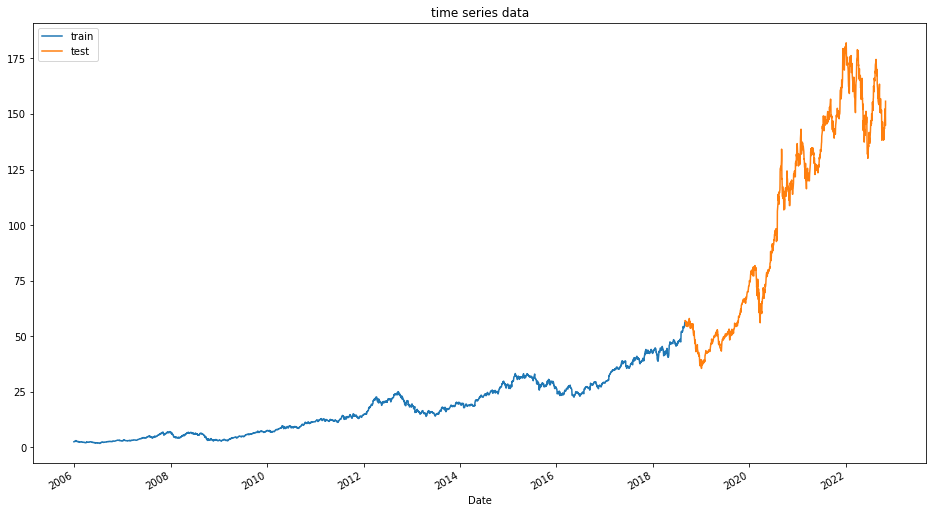

In [ ]:
plot_train_test(y_train,y_test)

In [ ]:
import tensorflow as tf

In [ ]:
X_train.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7
Date,,,,,,,
2002-01-11,0.379107,0.386607,0.403750,0.408929,0.423036,0.421071,0.416071
2002-01-14,0.375893,0.379107,0.386607,0.403750,0.408929,0.423036,0.421071
2002-01-15,0.377679,0.375893,0.379107,0.386607,0.403750,0.408929,0.423036
2002-01-16,0.387500,0.377679,0.375893,0.379107,0.386607,0.403750,0.408929
2002-01-17,0.371071,0.387500,0.377679,0.375893,0.379107,0.386607,0.403750


In [ ]:
X_train.shape,y_test.shape

((4189, 7), (1048, 1))

In [ ]:
#prepare the train and test datasets using the tf.data.Dataset_from_tensor_slices
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
for element in train_features_dataset.take(2):
  print(element.shape,element)

(7,) tf.Tensor(
[0.379107   0.38660699 0.40375    0.40892899 0.42303601 0.42107099
 0.416071  ], shape=(7,), dtype=float64)
(7,) tf.Tensor(
[0.375893   0.379107   0.38660699 0.40375    0.40892899 0.42303601
 0.42107099], shape=(7,), dtype=float64)


In [ ]:
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

In [ ]:
for item,label in train_dataset.take(2):
  print(f"features: {item} ==> label: {label}")

features: [0.379107   0.38660699 0.40375    0.40892899 0.42303601 0.42107099
 0.416071  ] ==> label: [0.375893]
features: [0.375893   0.379107   0.38660699 0.40375    0.40892899 0.42303601
 0.42107099] ==> label: [0.37767899]


In [ ]:
for item,label in test_dataset.take(2):
  print(f"features: {item} ==> label: {label}")

features: [56.25749969 55.74499893 54.92499924 54.48500061 54.04000092 53.87250137
 53.76250076] ==> label: [56.90750122]
features: [56.90750122 56.25749969 55.74499893 54.92499924 54.48500061 54.04000092
 53.87250137] ==> label: [57.09000015]


In [ ]:
#cross check
prices.head(2)

,price,lag1,lag2,lag3,lag4,lag5,lag6,lag7
Date,,,,,,,,
2002-01-11,0.375893,0.379107,0.386607,0.403750,0.408929,0.423036,0.421071,0.416071
2002-01-14,0.377679,0.375893,0.379107,0.386607,0.403750,0.408929,0.423036,0.421071


In [ ]:
#prepare the datasets in batches and set the prefetching buffer size to tf.data.AUTOTUNE
BATCH_SIZE=512
train_dataset.batch(128).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset.batch(128).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [ ]:
for X,y in train_dataset.take(2):
  print(f"X_train: {X}, y_train:{y}")
  print(X.shape,y.shape)

X_train: [0.379107   0.38660699 0.40375    0.40892899 0.42303601 0.42107099
 0.416071  ], y_train:[0.375893]
(7,) (1,)
X_train: [0.375893   0.379107   0.38660699 0.40375    0.40892899 0.42303601
 0.42107099], y_train:[0.37767899]
(7,) (1,)


In [ ]:
#bit of practice on tf.data.Datasets.from_tensor_slices

In [ ]:
A=np.arange(20).reshape(4,5)

In [ ]:
A,A.shape

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]), (4, 5))

In [ ]:
dataset_A=tf.data.Dataset.from_tensor_slices(A)

In [ ]:
for item in dataset_A.take(len(dataset_A)):
  print(item)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)
tf.Tensor([10 11 12 13 14], shape=(5,), dtype=int64)
tf.Tensor([15 16 17 18 19], shape=(5,), dtype=int64)


In [ ]:
dataset_B=tf.data.Dataset.from_tensor_slices(np.array([10,20,30,40,50]))

In [ ]:
dataset=tf.data.Dataset.zip((dataset_A,dataset_B))
dataset

<ZipDataset element_spec=(TensorSpec(shape=(5,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for A,B in dataset.take(len(dataset)):
  print(f"A slice:{A},==> B slice:{B}")

A slice:[0 1 2 3 4],==> B slice:10
A slice:[5 6 7 8 9],==> B slice:20
A slice:[10 11 12 13 14],==> B slice:30
A slice:[15 16 17 18 19],==> B slice:40


In [ ]:
#let's productify this fucntion to create these two datasets (train_dataset) and (test_dataset) which also include the relevant labels
def make_train_test_datasets(X_train,X_test,y_train,y_test):

  X_train_dataset=tf.data.Dataset.from_tensor_slices(X_train)
  X_test_dataset=tf.data.Dataset.from_tensor_slices(X_test)
  y_train_dataset=tf.data.Dataset.from_tensor_slices(y_train)
  y_test_dataset=tf.data.Dataset.from_tensor_slices(y_test)

  train_dataset=tf.data.Dataset.zip((X_train_dataset,y_train_dataset))
  test_dataset=tf.data.Dataset.zip((X_test_dataset,y_test_dataset))

  train_dataset.batch(512).prefetch(tf.data.AUTOTUNE)
  test_dataset.batch(512).prefetch(tf.data.AUTOTUNE)
  
  return train_dataset,test_dataset

In [ ]:
train_dataset,test_dataset=make_train_test_datasets(X_train,X_test,y_train,y_test)

In [ ]:
#let's very the first two slices with associated labels
for test,label in test_dataset.take(2):
  print(f"train slice: {test.numpy()}==> label:{label.numpy()}")

train slice: [56.25749969 55.74499893 54.92499924 54.48500061 54.04000092 53.87250137
 53.76250076]==> label:[56.90750122]
train slice: [56.90750122 56.25749969 55.74499893 54.92499924 54.48500061 54.04000092
 53.87250137]==> label:[57.09000015]


##Step3: create several forecasting models##

In [ ]:
test,label

(<tf.Tensor: shape=(7,), dtype=float64, numpy=
 array([56.90750122, 56.25749969, 55.74499893, 54.92499924, 54.48500061,
        54.04000092, 53.87250137])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([57.09000015])>)

In [ ]:
WINDOW,HORIZON

(7, 1)

In [ ]:
tf.random.set_seed=42

In [ ]:
#let's build a sequential Dense Model
from tensorflow.keras import layers
model1=tf.keras.Sequential([
    layers.Dense(128,activation="relu",input_shape=(WINDOW,),kernel_initializer="he_normal"),
    layers.Dense(HORIZON)],name="model1_Dense")

In [ ]:
model1.compile(loss=["mae"],optimizer=tf.keras.optimizers.Adam())

In [ ]:
model1.summary()

Model: "model1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


let's first use the simple data X_train and X_test and y_train and y_test to fit the model and evaluate the results. Then repeat the same steps using the train and test_datasets and monitor the time difference andc the results

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4189, 7), (1048, 7), (4189, 1), (1048, 1))

In [ ]:
import os

In [ ]:
#example on using os and path.join method to create the filepath
path="/content/my_experiments"
model_name="model1"
filepath=os.path.join(path,model_name)
filepath

'/content/my_experiments/model1'

In [ ]:
def create_Model_callback(model_name,save_path="/content/my_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),monitor="val_loss",save_best_only=True)

In [ ]:
model1.name

'model1_Dense'

In [ ]:
my_model_checkpoint=create_Model_callback(model1.name)

In [ ]:
my_early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=20)

In [ ]:
my_model_checkpoint,my_early_stop

(<keras.callbacks.ModelCheckpoint at 0x7f66850fe9d0>,
 <keras.callbacks.EarlyStopping at 0x7f66851034d0>)

In [ ]:
%%time
model1_history=model1.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1000,validation_data=(X_test,y_test),callbacks=[my_model_checkpoint,my_early_stop],verbose=1)

Epoch 1/1000
9/9 [==============================] - 3s 80ms/step - loss: 14.1094 - val_loss: 42.0894
Epoch 2/1000
9/9 [==============================] - 0s 57ms/step - loss: 2.7428 - val_loss: 28.7148
Epoch 3/1000
9/9 [==============================] - 0s 57ms/step - loss: 2.4003 - val_loss: 10.0725
Epoch 4/1000
9/9 [==============================] - 0s 53ms/step - loss: 1.2348 - val_loss: 6.2481
Epoch 5/1000
9/9 [==============================] - 0s 51ms/step - loss: 0.7303 - val_loss: 5.4678
Epoch 6/1000
9/9 [==============================] - 0s 47ms/step - loss: 0.4637 - val_loss: 3.3768
Epoch 7/1000
9/9 [==============================] - 0s 48ms/step - loss: 0.3909 - val_loss: 2.6957
Epoch 8/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.3221 - val_loss: 2.7109
Epoch 9/1000
9/9 [==============================] - 0s 50ms/step - loss: 0.3039 - val_loss: 2.6213
Epoch 10/1000
9/9 [==============================] - 0s 48ms/step - loss: 0.2977 - val_loss: 2.6114
Epoch 

In [ ]:
model1.evaluate(X_test,y_test)

33/33 [==============================] - 0s 2ms/step - loss: 1.6322


1.632158875465393

In [ ]:
model1=tf.keras.models.load_model("/content/my_experiments/model1_Dense")

In [ ]:
model1.evaluate(X_test,y_test)

33/33 [==============================] - 0s 2ms/step - loss: 1.6288


1.6287899017333984

In [ ]:
#this is a fucntion to plot the training performances
def plot_train_perf(model_name,history):
  title=f"{model_name.name} train & val Losses"
  return pd.DataFrame(history.history).plot(figsize=(10,7),title=title)

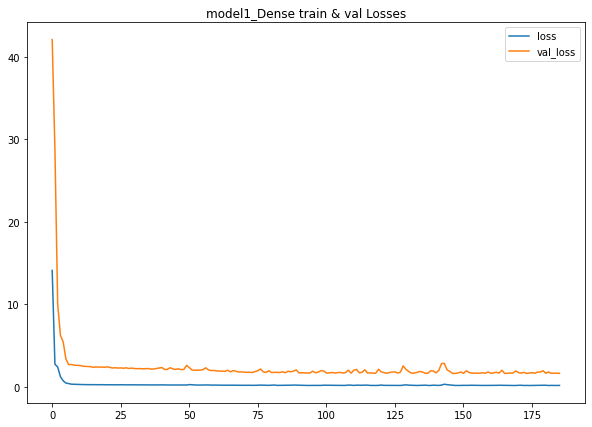

In [ ]:
plot_train_perf(model1,model1_history)

In [ ]:
preds=model1.predict(X_test)

33/33 [==============================] - 0s 1ms/step


In [ ]:
preds

array([[ 56.235672],
       [ 56.82577 ],
       [ 57.156265],
       ...,
       [151.65428 ],
       [150.19186 ],
       [145.2261  ]], dtype=float32)

In [ ]:
y_test

,price
Date,
2018-08-31,56.907501
2018-09-04,57.090000
2018-09-05,56.717499
2018-09-06,55.775002
2018-09-07,55.325001
...,...
2022-10-24,149.449997
2022-10-25,152.339996
2022-10-26,149.350006


In [ ]:
#need to create function to measure all the relevant metrics

In [ ]:
y_true=y_test.values

In [ ]:
X_test.shape,y_test.shape,y_true.shape

((1048, 7), (1048, 1), (1048, 1))

In [ ]:
preds

array([[ 56.235672],
       [ 56.82577 ],
       [ 57.156265],
       ...,
       [151.65428 ],
       [150.19186 ],
       [145.2261  ]], dtype=float32)

In [ ]:
y_test.index

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=1048, freq=None)

In [ ]:
def plot_pred_perf(y_true,preds,offset=500):
  plt.figure(figsize=(10,7))
  x=y_test.index[-offset:]
  plt.scatter(x,y_true[-offset:],marker="o",label="true values",color="red")
  plt.scatter(x,preds[-offset:],marker="+",label="predict values",color="blue")
  plt.legend()

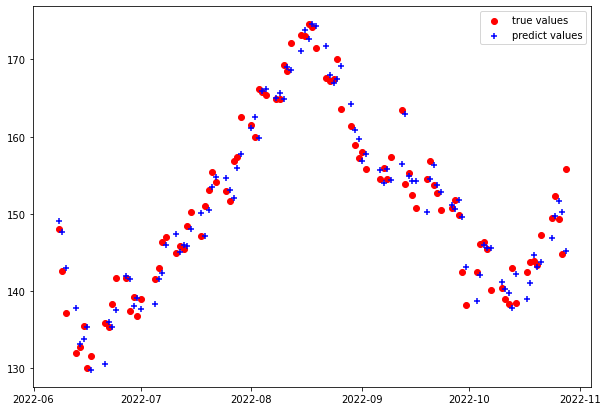

In [ ]:
plot_pred_perf(y_true,preds,offset=100)

In [ ]:
def calculate_MASE(y_true,preds):
  y_true_baseline=y_true[1:]
  preds_baseline=y_true[:-1]
  mae=np.mean(np.abs(y_true-preds))
  mae_baseline=np.mean(np.abs(y_true_baseline-preds_baseline))  #remember that the baseline model is the naive forecasting i.e. preds=y_true.shift()
  MASE=mae/mae_baseline
  return mae_baseline,MASE

In [ ]:
#let's now create some usweful fucntion for measuring model persormances
#want to use MAE,MAPE,RMSE as loss functions
def evaluate_predictions(y_true,preds):

  MAE=np.mean(np.abs(y_true-preds))
  MAPE=np.mean(np.abs(1-preds/y_true))*100
  MSE=np.mean((y_true-preds)**2)
  RMSE=np.sqrt(MSE)
  mae_baseline,MASE=calculate_MASE(y_true,preds)
  perf={"baseline":mae_baseline,"MAE":MAE,"MAPE":MAPE,"MSE":MSE,"RMSE":RMSE,"MASE":MASE}
  return perf

In [ ]:
perf1=evaluate_predictions(y_true,preds)
perf1

{'baseline': 1.6065732779225055,
 'MAE': 1.6287899344932033,
 'MAPE': 1.5709636724229723,
 'MSE': 5.565640152992176,
 'RMSE': 2.3591609001914593,
 'MASE': 1.0138285983440647}

In [ ]:
#check using also some builtin keras funnctions for calculatring regression losses
mae=tf.keras.losses.MeanAbsoluteError()(y_true,preds)
mape=tf.keras.losses.MeanAbsolutePercentageError()(y_true,preds)
mse=tf.keras.losses.MeanSquaredError()(y_true,preds)
{"mae":mae.numpy(),"mape":mape.numpy(),"mse":mse.numpy(),"rmse":np.sqrt(mse.numpy())}

{'mae': 1.6287899, 'mape': 1.5709636, 'mse': 5.5656404, 'rmse': 2.359161}

this is important to remember the MAE of baseline **is 'baseline': 1.606573**, while the mae of **model1 is 'MAE': 1.6662667689432624**

In [ ]:
model1.summary()

Model: "model1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#let's see if changing something in model1 can eventually imporve the results. Will define this time using a fucntional API
input=tf.keras.Input(shape=(WINDOW,),name="input_layer")
x=tf.keras.layers.Dense(128,activation="relu",name="Dense_1")(input)
x=tf.keras.layers.Dense(64,activation="relu",name="Dense_2")(x)
output=tf.keras.layers.Dense(HORIZON,activation="linear",name="output_layer")(x)
model2=tf.keras.Model(input,output,name="model2_Dense")


In [ ]:
model2.summary()

Model: "model2_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 Dense_1 (Dense)             (None, 128)               1024      
                                                                 
 Dense_2 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

In [ ]:
model2_history=model2.fit(X_train.values,y_train.values,batch_size=BATCH_SIZE,epochs=1000,validation_data=(X_test.values,y_test.values),callbacks=[create_Model_callback(model2.name),my_early_stop],verbose=0)

In [ ]:
model2.evaluate(X_test.values,y_test.values)

33/33 [==============================] - 0s 2ms/step - loss: 1.8640


1.8639932870864868

In [ ]:
#let's select the best pattern
model2=tf.keras.models.load_model("/content/my_experiments/model2_Dense")

In [ ]:
model2.evaluate(X_test.values,y_test.values)

33/33 [==============================] - 0s 2ms/step - loss: 1.6511


1.6511482000350952

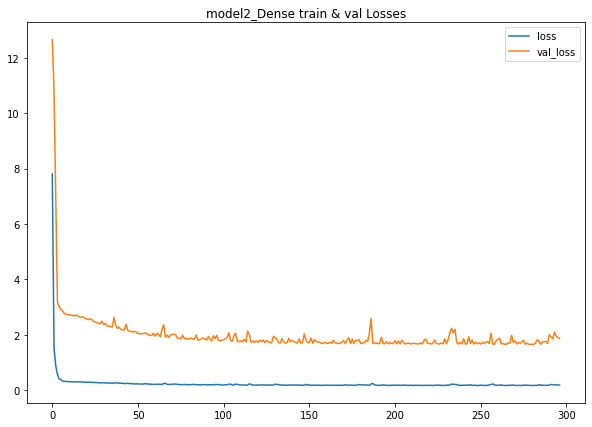

In [ ]:
#let's see the training performances of model2 vs thos of model1
plot_train_perf(model2,model2_history)

In [ ]:
preds=model2.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [ ]:
perf2=evaluate_predictions(y_true,preds)
perf2

{'baseline': 1.6065732779225055,
 'MAE': 1.6511481518053825,
 'MAPE': 1.5873085976705832,
 'MSE': 5.624908250394222,
 'RMSE': 2.3716889025321644,
 'MASE': 1.0277453101551133}

So with little improvement (added another Dense layer) I've got an error of 'MAE': 1.6091324937252598 which is better than model1 MAE = 1.66 but still slighltly worst than the baseline

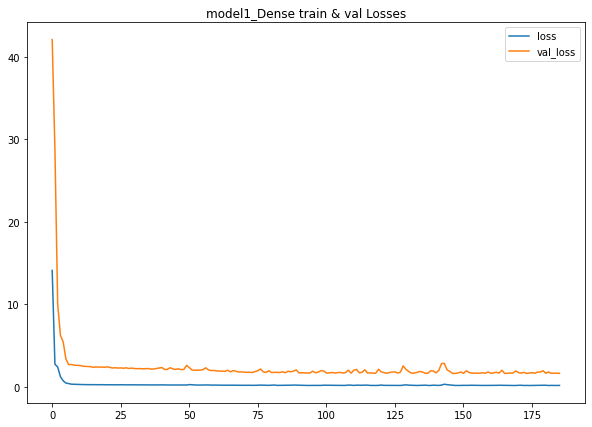

In [ ]:
plot_train_perf(model1,model1_history)

**is evident that model1 is performing much better tham model2...** as the mae is more than 10x. If I change the activation fucntion of model2 to relu (from origial tanh) the I get a result which is much closer to model1

what to modify my model just adding or subtracting a skip connection using the **commands tf.keras.Add/Subtract([x1,x2])**

In [ ]:
#let's try now to add a residual to our model2. I reuse here the fucntional API
input=tf.keras.Input(shape=(WINDOW,),name="input_layer")
x=tf.keras.layers.Dense(128,activation="relu",name="Dense_1")(input)
#x=tf.keras.layers.subtract([input,x],name="skip_subtract")
x=tf.keras.layers.Dense(7,activation="relu",name="Dense_2")(x)
skip=tf.keras.layers.add([input,x],name="skip_add")
output=tf.keras.layers.Dense(HORIZON,activation="linear",name="output_layer")(skip)
model3=tf.keras.Model(input,output,name="model3_Dense_skip")

In [ ]:
model3.summary()

Model: "model3_Dense_skip"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 7)]          0           []                               
                                                                                                  
 Dense_1 (Dense)                (None, 128)          1024        ['input_layer[0][0]']            
                                                                                                  
 Dense_2 (Dense)                (None, 7)            903         ['Dense_1[0][0]']                
                                                                                                  
 skip_add (Add)                 (None, 7)            0           ['input_layer[0][0]',            
                                                                  'Dense_2[0][0]']

In [ ]:
model3.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

In [ ]:
model3_history=model3.fit(X_train.values,y_train.values,batch_size=BATCH_SIZE,epochs=1000,validation_data=(X_test.values,y_test.values),callbacks=[create_Model_callback(model3.name),my_early_stop],verbose=0)

In [ ]:
model3.evaluate(X_test.values,y_test.values)

33/33 [==============================] - 0s 2ms/step - loss: 1.6443


1.6442573070526123

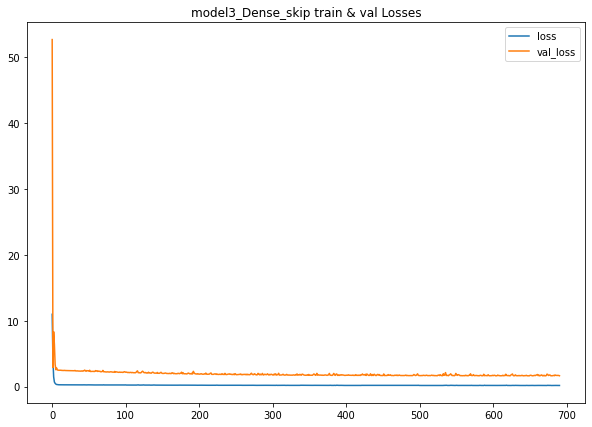

In [ ]:
plot_train_perf(model3,model3_history)

In [ ]:
preds3=model3.predict(X_test.values)

33/33 [==============================] - 0s 1ms/step


In [ ]:
perf3=evaluate_predictions(y_true,preds)
perf3

{'baseline': 1.6065732779225055,
 'MAE': 1.6511481518053825,
 'MAPE': 1.5873085976705832,
 'MSE': 5.624908250394222,
 'RMSE': 2.3716889025321644,
 'MASE': 1.0277453101551133}

**practically this residual model did not perform better than the original one**

let's now create model4 which is an **LSTM = Long Short Term memory CNN model**

In [ ]:
input=tf.keras.Input(shape=(WINDOW,),name="input_layer")
print(input.shape)
#this is very important: we need to expand input dimensions from (batch,window=features) to (batch,timesteps,features) to be able to work with LSTM RNN
x=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1),name="expand_input")(input)
print(x.shape)
x=tf.keras.layers.LSTM(128,activation="tanh",kernel_initializer="he_normal",name="LSTM")(x)
print(x.shape)
output=tf.keras.layers.Dense(1,activation="linear",name="output")(x)
model4=tf.keras.Model(input,output,name="model4_LSTM")

(None, 7)
(None, 1, 7)
(None, 128)


In [ ]:
model4.summary()

Model: "model4_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 expand_input (Lambda)       (None, 1, 7)              0         
                                                                 
 LSTM (LSTM)                 (None, 128)               69632     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

In [ ]:
model4_history=model4.fit(X_train.values,y_train.values,batch_size=BATCH_SIZE,epochs=30,validation_data=(X_test.values,y_test.values),callbacks=[create_Model_callback(model4.name)],verbose=0)

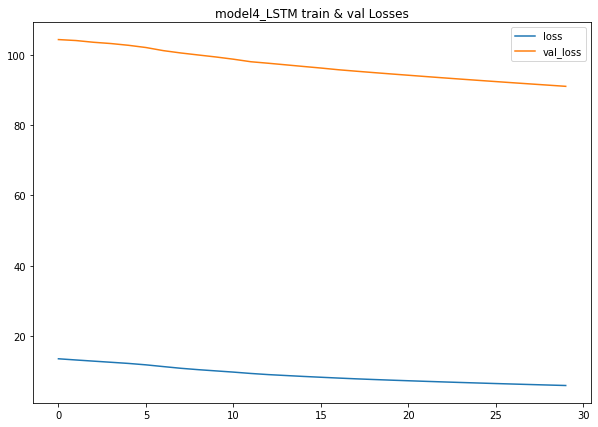

In [ ]:
plot_train_perf(model4,model4_history)

In [ ]:
model4=tf.keras.models.load_model("/content/my_experiments/model4_LSTM")

In [ ]:
model4.evaluate(X_test.values,y_test.values)

33/33 [==============================] - 0s 2ms/step - loss: 90.9812


90.98115539550781

In [ ]:
preds4=model4.predict(X_test.values)

33/33 [==============================] - 0s 2ms/step


In [ ]:
perf4=evaluate_predictions(y_true,preds4)
perf4

{'baseline': 1.6065732779225055,
 'MAE': 90.9811641906054,
 'MAPE': 83.56936373018556,
 'MSE': 10285.074289057675,
 'RMSE': 101.41535529227157,
 'MASE': 56.63057231242829}

Is eveident that an LSTM RNN in not performing better than a simple Dense CNN

In [ ]:
model1.name

'model1_Dense'

In [ ]:
model3.name,perf3["MAE"]

('model3_Dense_skip', 1.6511481518053825)

In [ ]:
data={"naive":perf4["baseline"],model1.name:perf1["MAE"],model2.name:perf2["MAE"],model3.name:perf3["MAE"],model4.name:perf4["MAE"]}

In [ ]:
data.keys()

dict_keys(['naive', 'model1_Dense', 'model2_Dense', 'model3_Dense_skip', 'model4_LSTM'])

In [ ]:
df=pd.DataFrame(data,index=["performance"])

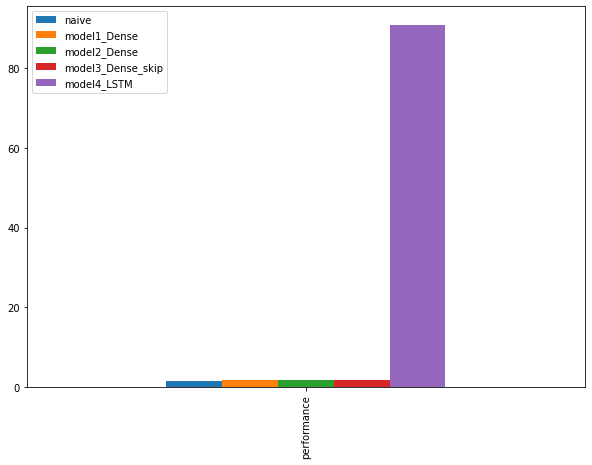

In [ ]:
#let's now make a simple performance comparison among all the models
pd.DataFrame(df).plot(figsize=(10,7),kind="bar")

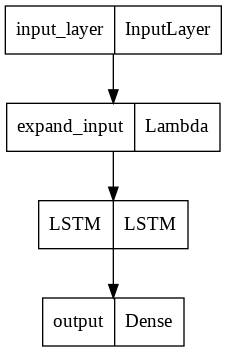

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model4)

In [ ]:
#prepare model2 as best model for consecutive predictions

let's use now the tensorflow pipeline (which is the best way to input data to a CNN) using the datasets created above and see that the results are the same

In [ ]:
train_dataset,test_dataset

(<ZipDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>,
 <ZipDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>)

In [ ]:
for input,label in train_dataset.take(1):
  print(f"input shape: {input.shape}")
  print(f"label shape: {label.shape}")

input shape: (7,)
label shape: (1,)


In [ ]:
x=np.array([1,2,3,4])
x

array([1, 2, 3, 4])

In [ ]:
tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=0))(x)

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[1, 2, 3, 4]])>

we build now a model identical to model1_Dense, but we are going to use the dataset pipeline that was created with the **tf.data.Dataset.from_tensor_slices** command

In [ ]:
from tensorflow.keras import layers
#model5=tf.keras.models.clone_model(model2)
model5=tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=0),name="expamd_dims"),
    layers.Dense(128,activation="relu",input_shape=(WINDOW,),
                 kernel_initializer="he_normal",name="Dense"),
                 layers.Dense(HORIZON,name="output")],name="model5")

In [ ]:
model5.build(input_shape=(WINDOW,))

In [ ]:
model5.summary()

Model: "model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 expamd_dims (Lambda)        (1, 7)                    0         
                                                                 
 Dense (Dense)               (1, 128)                  1024      
                                                                 
 output (Dense)              (1, 1)                    129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


note that in such a model the input shape is (1,7) which means that 1 provide a tensor (1 window) and also the output shape is of kind (1,1) so this means I have to squeeze dimensions to calculate preds vector

In [ ]:
model5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

In [ ]:
model5_callback=create_Model_callback(model5.name)
model5_callback

In [ ]:
model5_earlystop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,verbose=1)

In [ ]:
model5_history=model5.fit(train_dataset,epochs=100,validation_data=test_dataset,callbacks=[model5_callback,model5_earlystop],verbose=1)

Epoch 1/100
4189/4189 [==============================] - 10s 2ms/step - loss: 0.6415 - val_loss: 3.0371
Epoch 2/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.5050 - val_loss: 3.2331
Epoch 3/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.4388 - val_loss: 3.5436
Epoch 4/100
4189/4189 [==============================] - 10s 2ms/step - loss: 0.4010 - val_loss: 2.5560
Epoch 5/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.3896 - val_loss: 3.4510
Epoch 6/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.3683 - val_loss: 3.9905
Epoch 7/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.3852 - val_loss: 2.5705
Epoch 8/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.3458 - val_loss: 2.8326
Epoch 9/100
4189/4189 [==============================] - 9s 2ms/step - loss: 0.3054 - val_loss: 3.5551
Epoch 9: early stopping


In [ ]:
model5=tf.keras.models.load_model("/content/my_experiments/model5")

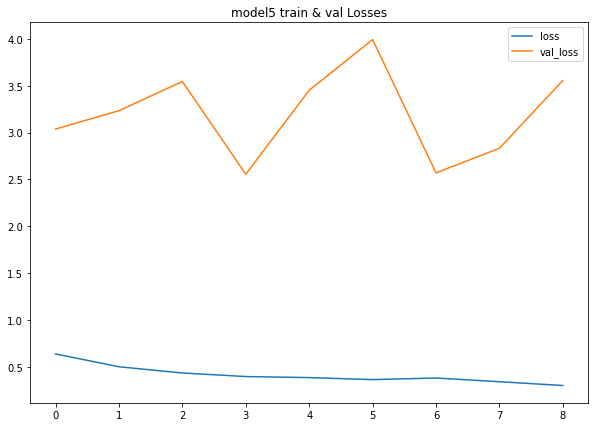

In [ ]:
plot_train_perf(model5,model5_history)

In [ ]:
model5.evaluate(test_dataset)

1048/1048 [==============================] - 2s 2ms/step - loss: 2.5560


2.556027412414551

In [ ]:
preds=model5.predict(test_dataset)

1048/1048 [==============================] - 1s 1ms/step


In [ ]:
preds=tf.squeeze(preds,axis=1)

In [ ]:
preds.shape

TensorShape([1048])

In [ ]:
y_true.shape

(1048, 1)

In [ ]:
perf5=evaluate_predictions(y_true,preds)
perf5

{'baseline': 1.6065732779225055,
 'MAE': 51.49775,
 'MAPE': 63.821232318878174,
 'MSE': 4076.9414,
 'RMSE': 63.85093,
 'MASE': 32.05440426297027}

In [ ]:
perf1

{'baseline': 1.6065732779225055,
 'MAE': 1.6287899344932033,
 'MAPE': 1.5709636724229723,
 'MSE': 5.565640152992176,
 'RMSE': 2.3591609001914593,
 'MASE': 1.0138285983440647}

it seems that model1 is performing better wrt model5 which is practically the same BUT the reason is that model1 we trained for 1000 epochs while in model5 only for 100.

In [ ]:
def make_future_forecast(time_window,model,num_forecasts):
  l=len(time_window)
  for i in range(num_forecasts):
    prediction=tf.squeeze(model.predict(time_window)).numpy()
    new_time_window=np.append(time_window,prediction)
    time_window=new_time_window[-l:]
  return time_window

In [ ]:
#let's see an example
series=np.arange(7)
series
make_future_forecast(series,model5,3)

1/1 [==============================] - 0s 16ms/step


array([3.        , 4.        , 5.        , 6.        , 1.94430161,
       1.55716383, 2.88527513])

In [ ]:
#lets' do the testing

In [ ]:
series=y_true[-WINDOW:].T
series.shape


(1, 7)

In [ ]:
forecasts=make_future_forecast(tf.squeeze(series,axis=0),model5,10)
forecasts

1/1 [==============================] - 0s 15ms/step


array([151.85032654, 153.97409058, 152.83433533, 155.0247345 ,
       156.82669067, 156.151474  , 157.94219971])

In [ ]:
#let's play a bit with the numpy version of datetime which is expectimng a string of formar 'YY-MM-DD'
start_date=np.datetime64('2022-11-08')
start_date+np.timedelta64(3,"D")

numpy.datetime64('2022-11-11')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import tensorflow as tf
import os

In [14]:

#create a future dates starting from a start_date (in datetime format)
WINDOW=6
HORIZON=1
start_date=prices.index[-1]
last_window=prices.values[-WINDOW:]

bit of recap on using the **datetime and also the np.datetime64 methods** to 
manage date objects

In [67]:
#let's functionalize this
def create_future_dates(start_date,interval=1):
  
  end_date=start_date+np.timedelta64(interval,"D")
  new_dates=np.arange(start_date,end_date,dtype="datetime64[D]")
  return new_dates

In [5]:
start_date=np.datetime64("2022-11-07")

In [9]:
future_dates=create_future_dates(start_date,interval=5)
future_dates

DatetimeIndex(['2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11'],
              dtype='datetime64[ns]', freq=None)

In [27]:
SYMBOL="AAPL"
start=datetime.datetime(2002,1,1)
stop=datetime.datetime(2022,11,10)

In [58]:
def download_price_data(symbol,start,end): 
  
  data=yf.download(SYMBOL,start,stop,period="1d")
  drop_columns=data.columns[data.columns!="Close"]
  data.drop(columns=drop_columns,inplace=True)
  data["ret"]=data["Close"]/data["Close"].shift()-1
  return data["ret"]

In [59]:
returns=download_price_data(SYMBOL,start,stop)

[*********************100%***********************]  1 of 1 completed


In [60]:
returns

Date
2002-01-02         NaN
2002-01-03    0.012017
2002-01-04    0.004667
2002-01-07   -0.033347
2002-01-08   -0.012665
                ...   
2022-11-03   -0.042405
2022-11-04   -0.003600
2022-11-07    0.003902
2022-11-08    0.004175
2022-11-09   -0.033190
Name: ret, Length: 5252, dtype: float64

In [62]:
start_date=returns.index[-1]

In [63]:
start_date

Timestamp('2022-11-09 00:00:00')

In [65]:
start_date=np.datetime64(start_date)

In [69]:
new_dates=create_future_dates(start_date,interval=5)

In [70]:
new_dates

array(['2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
       '2022-11-13'], dtype='datetime64[D]')

In [71]:
pd.to_datetime(new_dates)

DatetimeIndex(['2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
               '2022-11-13'],
              dtype='datetime64[ns]', freq=None)

In [72]:
returns.index[-10:]

DatetimeIndex(['2022-10-27', '2022-10-28', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-07',
               '2022-11-08', '2022-11-09'],
              dtype='datetime64[ns]', name='Date', freq=None)